<a href="https://colab.research.google.com/github/rjnakano/manejo-inventarios-pdg/blob/main/Notebooks/TDGClusteringJerarquicoV1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install hdbscan

     |████████████████████████████████| 6.4MB 4.0MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for hdbscan: filename=hdbscan-0.8.27-cp37-cp37m-linux_x86_64.whl size=2311675 sha256=026aa5bb1715e52299d3bc84e2263ea362696ecfbed656e9b43359c1ced34ee6
  Stored in directory: /root/.cache/pip/wheels/42/63/fb/314ad6c3b270887a3ecb588b8e5aac50b0fad38ff89bb6dff2
Successfully built hdbscan


In [2]:
!pip install gower

  Created wheel for gower: filename=gower-0.0.5-cp37-none-any.whl size=4232 sha256=6d4bdbfcf89333294908c900d88e25511b8e4450b9103b9d8fb6c61d70d20b75
  Stored in directory: /root/.cache/pip/wheels/c0/09/9b/072d54d6ced0f43a179852e3f09532d0131e25ff7cb4e5ee75
Successfully built gower


In [3]:
from google.colab import drive
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import hdbscan
import gower

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_context('poster')
sns.set_style('white')
sns.set_color_codes()

In [4]:
plot_kwds = {'alpha' : 0.5, 's' : 1, 'linewidths':0}

In [5]:
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [6]:
!ls -l /content/gdrive/MyDrive/TDGdata/

total 11917268
-rw------- 1 root root    1108073 Apr 11 21:27 dfDims.csv
-rw------- 1 root root     795978 Apr 11 21:27 dfNoDims.csv
-rw------- 1 root root    2569549 Apr 11 21:27 k2Dims.csv
-rw------- 1 root root    1506267 Apr 11 21:27 k2NoDims.csv
-rw------- 1 root root    2569549 Apr 11 21:27 k3Dims.csv
-rw------- 1 root root    1506267 Apr 11 21:27 k3NoDims.csv
-rw------- 1 root root 5596536100 Apr 11 23:46 scores2.csv
-rw------- 1 root root 6596688400 Apr 11 23:40 scores.csv


In [7]:
# Matriz de distancias (disimilitud)
df = pd.read_csv("/content/gdrive/MyDrive/TDGdata/scores.csv", header = None)

In [8]:
df.iloc[0][0:5]

0    0.000000
1    0.016479
2    0.591425
3    0.000673
4    1.002986
Name: 0, dtype: float64

In [9]:
df.shape

(16244, 16244)

In [10]:
# Clustering jerarquico
clusterer = hdbscan.HDBSCAN(metric='precomputed', min_cluster_size=100, gen_min_span_tree=True)

In [11]:
clusterer.fit(df)

HDBSCAN(algorithm='best', allow_single_cluster=False, alpha=1.0,
        approx_min_span_tree=True, cluster_selection_epsilon=0.0,
        cluster_selection_method='eom', core_dist_n_jobs=4,
        gen_min_span_tree=True, leaf_size=40,
        match_reference_implementation=False, memory=Memory(location=None),
        metric='precomputed', min_cluster_size=100, min_samples=None, p=None,
        prediction_data=False)

In [12]:
np.unique(clusterer.labels_)

array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [230]:
# Dataset de inventarios sin dimensiones de los productos
dataNoDims = pd.read_csv("/content/gdrive/MyDrive/TDGdata/dfNoDims.csv")

In [14]:
dataNoDims.head(5)

,AISLE,IG,HTS,PLANNING,ABC,UOM,CAT,COSTX,QTYVAR,CONTRPERC
0,17,IG56,HTS119,1/1,B,PC,CAT17,-289.8802,-2.63,0.01
1,17,IG56,HTS119,1/1,B,PC,CAT17,289.5527,25.00,0.00
2,17,IG56,HTS119,1/1,C,PC,CAT17,1111.3121,50.00,0.00
3,17,IG56,HTS119,1/1,B,PC,CAT17,-266.8633,-9.09,0.00
4,15,IG56,HTS119,1/1,C,PC,CAT17,-517.0436,-11.11,0.00


In [15]:
dataNoDims.shape

(16244, 10)

In [16]:
# Get the position of categorical columns
catColumnsPos = [dataNoDims.columns.get_loc(col) for col in list(dataNoDims.select_dtypes('object').columns)]
print('Categorical columns : {}'.format(list(dataNoDims.select_dtypes('object').columns)))
print('Categorical columns position : {}'.format(catColumnsPos))

Categorical columns : ['IG', 'HTS', 'PLANNING', 'ABC', 'UOM', 'CAT']
Categorical columns position : [1, 2, 3, 4, 5, 6]


In [17]:
# Get the position of numerical columns
numColumnsPos = [dataNoDims.columns.get_loc(col) for col in list(dataNoDims.select_dtypes('float64').columns)]
print('Numerical columns : {}'.format(list(dataNoDims.select_dtypes('float64').columns)))
print('Numerical columns position : {}'.format(numColumnsPos))

Numerical columns : ['COSTX', 'QTYVAR', 'CONTRPERC']
Numerical columns position : [7, 8, 9]


In [18]:
numdf = dataNoDims[list(dataNoDims.select_dtypes('float64').columns)]

In [19]:
scaled_features = StandardScaler().fit_transform(numdf.values)
scaled_features_df = pd.DataFrame(scaled_features, index=numdf.index, columns=numdf.columns)
scaled_features_df

,COSTX,QTYVAR,CONTRPERC
0,-0.029671,-0.037167,-0.185651
1,0.092655,-0.006905,-0.210139
2,0.266138,0.020477,-0.210139
3,-0.024812,-0.044242,-0.210139
4,-0.077628,-0.046455,-0.210139
...,...,...,...
16239,0.098319,-0.033191,-0.210139
16240,0.163875,-0.033191,-0.210139
16241,1.078580,0.115063,-0.210139
16242,-0.247688,-0.143812,-0.210139


In [20]:
catdf = dataNoDims[list(dataNoDims.select_dtypes('object').columns)]

In [21]:
print("catdf",catdf.shape)
print("scaled_features_df",scaled_features_df.shape)
print(catdf.head(5))
print(scaled_features_df.head(5))
print(catdf.tail(5))
print(scaled_features_df.tail(5))
dataNoDimsEst = pd.concat((catdf, scaled_features_df), axis = 1)
dataNoDimsEst

catdf (16244, 6)
scaled_features_df (16244, 3)
     IG     HTS PLANNING ABC UOM    CAT
0  IG56  HTS119      1/1   B  PC  CAT17
1  IG56  HTS119      1/1   B  PC  CAT17
2  IG56  HTS119      1/1   C  PC  CAT17
3  IG56  HTS119      1/1   B  PC  CAT17
4  IG56  HTS119      1/1   C  PC  CAT17
      COSTX    QTYVAR  CONTRPERC
0 -0.029671 -0.037167  -0.185651
1  0.092655 -0.006905  -0.210139
2  0.266138  0.020477  -0.210139
3 -0.024812 -0.044242  -0.210139
4 -0.077628 -0.046455  -0.210139
        IG    HTS PLANNING ABC UOM   CAT
16239  IG5  HTS67      1/0   C  BX  CAT2
16240  IG5  HTS67      1/0   C  BX  CAT2
16241  IG5  HTS67      1/0   C  BX  CAT2
16242  IG5  HTS67      1/0   C  BX  CAT2
16243  IG5  HTS67      1/0   C  BX  CAT2
          COSTX    QTYVAR  CONTRPERC
16239  0.098319 -0.033191  -0.210139
16240  0.163875 -0.033191  -0.210139
16241  1.078580  0.115063  -0.210139
16242 -0.247688 -0.143812  -0.210139
16243 -0.022349 -0.089049  -0.210139


,IG,HTS,PLANNING,ABC,UOM,CAT,COSTX,QTYVAR,CONTRPERC
0,IG56,HTS119,1/1,B,PC,CAT17,-0.029671,-0.037167,-0.185651
1,IG56,HTS119,1/1,B,PC,CAT17,0.092655,-0.006905,-0.210139
2,IG56,HTS119,1/1,C,PC,CAT17,0.266138,0.020477,-0.210139
3,IG56,HTS119,1/1,B,PC,CAT17,-0.024812,-0.044242,-0.210139
4,IG56,HTS119,1/1,C,PC,CAT17,-0.077628,-0.046455,-0.210139
...,...,...,...,...,...,...,...,...,...
16239,IG5,HTS67,1/0,C,BX,CAT2,0.098319,-0.033191,-0.210139
16240,IG5,HTS67,1/0,C,BX,CAT2,0.163875,-0.033191,-0.210139
16241,IG5,HTS67,1/0,C,BX,CAT2,1.078580,0.115063,-0.210139
16242,IG5,HTS67,1/0,C,BX,CAT2,-0.247688,-0.143812,-0.210139


In [22]:
# Matriz de distancias de Gower
gowerDistMatrix = gower.gower_matrix(dataNoDimsEst)

In [23]:
gowerDistMatrix = np.float64(gowerDistMatrix)

In [24]:
clusterer2 = hdbscan.HDBSCAN(metric='precomputed', min_cluster_size=100)

In [25]:
clusterer2.fit(gowerDistMatrix)

HDBSCAN(algorithm='best', allow_single_cluster=False, alpha=1.0,
        approx_min_span_tree=True, cluster_selection_epsilon=0.0,
        cluster_selection_method='eom', core_dist_n_jobs=4,
        gen_min_span_tree=False, leaf_size=40,
        match_reference_implementation=False, memory=Memory(location=None),
        metric='precomputed', min_cluster_size=100, min_samples=None, p=None,
        prediction_data=False)

In [26]:
np.unique(clusterer2.labels_)

array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15,
       16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32,
       33, 34, 35, 36, 37, 38, 39, 40, 41])

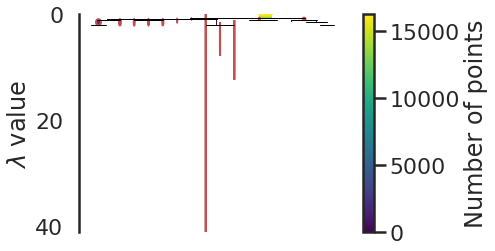

In [27]:
# Línea larga = cluster 3
clusterer.condensed_tree_.plot(select_clusters = True)

In [28]:
unique, counts = np.unique(clusterer.labels_, return_counts=True)

print(np.asarray((unique, counts)).T)

[[  -1 7427]
 [   0 1614]
 [   1  882]
 [   2  123]
 [   3  249]
 [   4  122]
 [   5  132]
 [   6  163]
 [   7  638]
 [   8  538]
 [   9  440]
 [  10 2815]
 [  11 1101]]


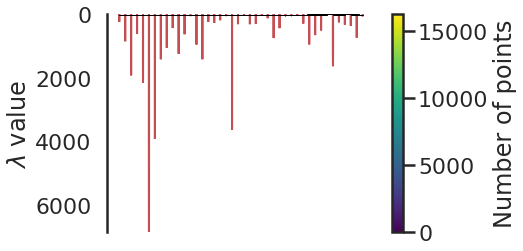

In [29]:
# Líneas largas = cluster 33, 36, 22
clusterer2.condensed_tree_.plot(select_clusters = True)

In [30]:
unique, counts = np.unique(clusterer2.labels_, return_counts=True)

print(np.asarray((unique, counts)).T)

[[  -1 6664]
 [   0  380]
 [   1  299]
 [   2  200]
 [   3  447]
 [   4  339]
 [   5  468]
 [   6  103]
 [   7  213]
 [   8  107]
 [   9  278]
 [  10  231]
 [  11  172]
 [  12  288]
 [  13  156]
 [  14  134]
 [  15  108]
 [  16  677]
 [  17  159]
 [  18  108]
 [  19  125]
 [  20  586]
 [  21  124]
 [  22  260]
 [  23  191]
 [  24  121]
 [  25  148]
 [  26  141]
 [  27  148]
 [  28  149]
 [  29  278]
 [  30  348]
 [  31  166]
 [  32  136]
 [  33  122]
 [  34  159]
 [  35  358]
 [  36  348]
 [  37  132]
 [  38  126]
 [  39  197]
 [  40  119]
 [  41  231]]


In [231]:
dataNoDims['Cluster_dissimKP']=clusterer.labels_

In [232]:
dataNoDims['Cluster_Gower']=clusterer2.labels_

In [33]:
dataNoDims.head(5)

,AISLE,IG,HTS,PLANNING,ABC,UOM,CAT,COSTX,QTYVAR,CONTRPERC,Cluster_dissimKP,Cluster_Gower
0,17,IG56,HTS119,1/1,B,PC,CAT17,-289.8802,-2.63,0.01,10,37
1,17,IG56,HTS119,1/1,B,PC,CAT17,289.5527,25.00,0.00,10,37
2,17,IG56,HTS119,1/1,C,PC,CAT17,1111.3121,50.00,0.00,-1,-1
3,17,IG56,HTS119,1/1,B,PC,CAT17,-266.8633,-9.09,0.00,10,37
4,15,IG56,HTS119,1/1,C,PC,CAT17,-517.0436,-11.11,0.00,10,-1


In [34]:
dataNoDims.sample(5)

,AISLE,IG,HTS,PLANNING,ABC,UOM,CAT,COSTX,QTYVAR,CONTRPERC,Cluster_dissimKP,Cluster_Gower
12710,19,IG56,HTS119,1/1,B,PC,CAT17,1186.2348,1.00,0.01,10,37
16007,6,IG11,HTS6,1/1,A,BX,CAT5,-755.6529,-4.17,0.03,2,11
7059,4,IG35,HTS51,1/0,A,YD,CAT12,60.3539,0.48,0.04,0,5
5295,2,IG38,HTS61,1/1,B,SQFT,CAT8,202.4717,3.34,0.00,4,14
8738,3,IG30,HTS46,1/1,A,YD,CAT12,-2419.2031,-41.78,0.03,0,3


In [35]:
dataNoDims[dataNoDims['CAT']=='CAT14'].Cluster_dissimKP.unique()

array([ 9, -1,  7])

In [36]:
dataNoDims[dataNoDims['CAT']=='CAT14'].Cluster_Gower.unique()

array([20, 16, -1, 18, 19, 15, 17])

In [37]:
dataNoDimsEst.head(5)

,IG,HTS,PLANNING,ABC,UOM,CAT,COSTX,QTYVAR,CONTRPERC
0,IG56,HTS119,1/1,B,PC,CAT17,-0.029671,-0.037167,-0.185651
1,IG56,HTS119,1/1,B,PC,CAT17,0.092655,-0.006905,-0.210139
2,IG56,HTS119,1/1,C,PC,CAT17,0.266138,0.020477,-0.210139
3,IG56,HTS119,1/1,B,PC,CAT17,-0.024812,-0.044242,-0.210139
4,IG56,HTS119,1/1,C,PC,CAT17,-0.077628,-0.046455,-0.210139


In [38]:
dataNoDims3D = dataNoDimsEst.drop(['IG','HTS','PLANNING','UOM','CONTRPERC'], axis=1)

In [39]:
dataNoDims3D.head(5)

,ABC,CAT,COSTX,QTYVAR
0,B,CAT17,-0.029671,-0.037167
1,B,CAT17,0.092655,-0.006905
2,C,CAT17,0.266138,0.020477
3,B,CAT17,-0.024812,-0.044242
4,C,CAT17,-0.077628,-0.046455


In [40]:
dataNoDims3D=dataNoDims3D[dataNoDims3D['ABC']!='C']

In [41]:
dataNoDims3D['CAT'] = dataNoDims3D['CAT'] + "-" + dataNoDims3D['ABC']

In [42]:
dataNoDims3D = dataNoDims3D.drop(['ABC'], axis=1)

In [43]:
dataNoDims3D.head(5)

,CAT,COSTX,QTYVAR
0,CAT17-B,-0.029671,-0.037167
1,CAT17-B,0.092655,-0.006905
3,CAT17-B,-0.024812,-0.044242
5,CAT17-B,1.552990,1.937173
6,CAT17-B,-0.222051,-0.054822


In [44]:
dataNoDims['CAT'].value_counts()

CAT17    3988
CAT12    2558
CAT16    2455
CAT8     2221
CAT14    2139
CAT7     1222
CAT3      519
CAT10     251
CAT5      200
CAT2      190
CAT9      160
CAT1      146
CAT4      104
CAT15      83
CAT6        7
CAT11       1
Name: CAT, dtype: int64

In [45]:
dataNoDims3D['CAT'].value_counts()

CAT12-A    1670
CAT14-A    1500
CAT17-B    1312
CAT16-A    1106
CAT17-A    1065
CAT8-A      914
CAT16-B     648
CAT8-B      408
CAT12-B     376
CAT3-A      253
CAT7-A      229
CAT14-B     223
CAT7-B      210
CAT5-A      111
CAT3-B       69
CAT10-A      65
CAT1-A       60
CAT4-A       50
CAT1-B       49
CAT5-B       44
CAT10-B      35
CAT15-A      27
CAT4-B       27
CAT9-B       24
CAT2-B       22
CAT9-A       21
CAT15-B       5
CAT2-A        4
CAT6-B        4
CAT6-A        1
Name: CAT, dtype: int64

In [46]:
# Matriz de distancias de Gower
gowerDistMatrix3D = gower.gower_matrix(dataNoDims3D)

In [47]:
dataNoDims3D.shape

(10532, 3)

In [48]:
gowerDistMatrix3D = np.float64(gowerDistMatrix3D)

In [49]:
clusterer3 = hdbscan.HDBSCAN(metric='precomputed', min_cluster_size=500)

In [50]:
clusterer3.fit(gowerDistMatrix3D)

HDBSCAN(algorithm='best', allow_single_cluster=False, alpha=1.0,
        approx_min_span_tree=True, cluster_selection_epsilon=0.0,
        cluster_selection_method='eom', core_dist_n_jobs=4,
        gen_min_span_tree=False, leaf_size=40,
        match_reference_implementation=False, memory=Memory(location=None),
        metric='precomputed', min_cluster_size=500, min_samples=None, p=None,
        prediction_data=False)

In [51]:
np.unique(clusterer3.labels_)

array([-1,  0,  1,  2,  3,  4,  5,  6])

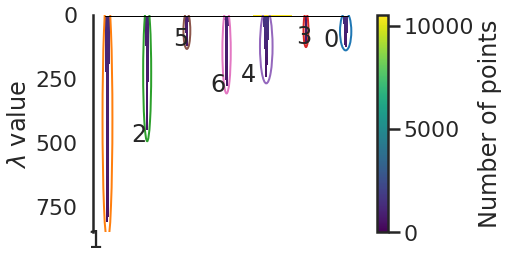

In [52]:
clusterer3.condensed_tree_.plot(select_clusters = True, label_clusters=True, selection_palette=sns.color_palette())

In [53]:
unique, counts = np.unique(clusterer3.labels_, return_counts=True)

print(np.asarray((unique, counts)).T)

[[  -1 2318]
 [   0 1500]
 [   1 1312]
 [   2 1065]
 [   3  648]
 [   4 1670]
 [   5  913]
 [   6 1106]]


In [54]:
dataNoDims3D['Cluster']=clusterer3.labels_

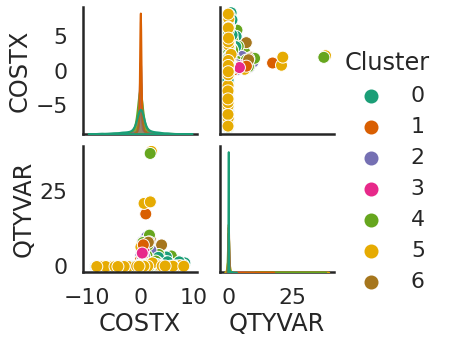

In [55]:
sns.pairplot(dataNoDims3D[dataNoDims3D['Cluster']!=-1],hue='Cluster',palette='Dark2',diag_kind='kde')

In [56]:
dataNoDims2D = dataNoDims3D.drop(['QTYVAR'], axis=1)

In [57]:
dataNoDims2D.head(5)

,CAT,COSTX,Cluster
0,CAT17-B,-0.029671,1
1,CAT17-B,0.092655,1
3,CAT17-B,-0.024812,1
5,CAT17-B,1.552990,1
6,CAT17-B,-0.222051,1


In [58]:
# Matriz de distancias de Gower
gowerDistMatrix2D = gower.gower_matrix(dataNoDims2D)

In [59]:
gowerDistMatrix2D = np.float64(gowerDistMatrix2D)

In [60]:
clusterer4 = hdbscan.HDBSCAN(metric='precomputed', min_cluster_size=500)

In [61]:
clusterer4.fit(gowerDistMatrix2D)

HDBSCAN(algorithm='best', allow_single_cluster=False, alpha=1.0,
        approx_min_span_tree=True, cluster_selection_epsilon=0.0,
        cluster_selection_method='eom', core_dist_n_jobs=4,
        gen_min_span_tree=False, leaf_size=40,
        match_reference_implementation=False, memory=Memory(location=None),
        metric='precomputed', min_cluster_size=500, min_samples=None, p=None,
        prediction_data=False)

In [62]:
np.unique(clusterer4.labels_)

array([-1,  0,  1,  2,  3,  4,  5,  6,  7])

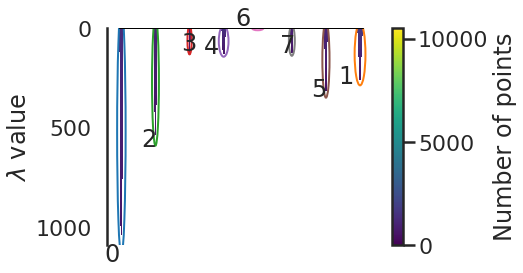

In [63]:
clusterer4.condensed_tree_.plot(select_clusters = True, label_clusters=True, selection_palette=sns.color_palette())

In [64]:
unique, counts = np.unique(clusterer4.labels_, return_counts=True)

print(np.asarray((unique, counts)).T)

[[  -1  609]
 [   0 1312]
 [   1 1670]
 [   2 1065]
 [   3  648]
 [   4 1500]
 [   5 1106]
 [   6 1708]
 [   7  914]]


In [65]:
dataNoDims2D['Cluster']=clusterer4.labels_

In [66]:
dataNoDims2D[dataNoDims2D['Cluster']==0].describe()

,COSTX,Cluster
count,1312.000000,1312.0
mean,0.045485,0.0
std,0.453637,0.0
min,-5.592811,0.0
25%,-0.017476,0.0
50%,0.038134,0.0
75%,0.089279,0.0
max,5.863289,0.0


In [67]:
dataNoDims2D[dataNoDims2D['Cluster']==1].describe()

,COSTX,Cluster
count,1670.000000,1670.0
mean,-0.019123,1.0
std,1.229733,0.0
min,-8.284366,1.0
25%,-0.343998,1.0
50%,-0.001263,1.0
75%,0.372641,1.0
max,7.090630,1.0


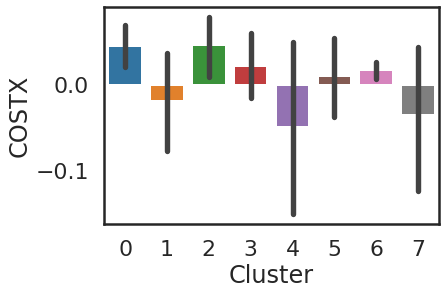

In [68]:
sns.barplot(x='Cluster', y='COSTX', data=dataNoDims2D[dataNoDims2D['Cluster']!=-1])

In [69]:
# AgglomerativeClustering
# https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html
# inversed = scaler.inverse_transform(scaled)

In [139]:
dataNoDims2D2 = dataNoDims

In [140]:
dataNoDims2D2.sample(5)

,AISLE,IG,HTS,PLANNING,ABC,UOM,CAT,COSTX,QTYVAR,CONTRPERC,Cluster_dissimKP,Cluster_Gower
940,13,IG53,HTS119,1/1,A,PC,CAT16,699.5741,16.67,0.01,11,29
11917,9,IG16,HTS76,1/1,C,BX,CAT12,-1336.1010,-100.00,0.00,-1,-1
6989,15,IG45,HTS24,1/0,C,PR,CAT17,296.3265,166.67,0.00,-1,-1
4648,99,IG30,HTS46,1/1,A,YD,CAT12,1357.4003,10.11,0.12,0,3
11740,4,IG30,HTS35,1/1,C,YD,CAT12,3197.6556,1.00,0.00,0,-1


In [141]:
dataNoDims2D2['CAT'] = dataNoDims2D2['CAT'] + "-" + dataNoDims2D2['ABC']

In [142]:
dataNoDims2D2 = dataNoDims2D2[dataNoDims2D2['ABC']!='C']

In [143]:
dataNoDims2D2.shape

(10532, 12)

In [144]:
dataNoDims2D2=dataNoDims2D2.reset_index(drop=True)

In [145]:
dataNoDims2D2 =  dataNoDims2D2.drop(['AISLE','IG','HTS','PLANNING','ABC','UOM','QTYVAR','CONTRPERC','Cluster_dissimKP', 'Cluster_Gower'], axis=1)

In [146]:
numdf = dataNoDims2D2[list(dataNoDims2D2.select_dtypes('float64').columns)]

In [147]:
scaled_features = StandardScaler().fit_transform(numdf.values)
scaled_features_df = pd.DataFrame(scaled_features, index=numdf.index, columns=numdf.columns)
scaled_features_df

,COSTX
0,-0.021135
1,0.084938
2,-0.016921
3,1.351250
4,-0.187955
...,...
10527,-0.157306
10528,0.130101
10529,-0.120447
10530,0.808661


In [148]:
catdf = dataNoDims2D2[list(dataNoDims2D2.select_dtypes('object').columns)]

In [149]:
print("catdf",catdf.shape)
print("scaled_features_df",scaled_features_df.shape)
print(catdf.head(5))
print(scaled_features_df.head(5))
print(catdf.tail(5))
print(scaled_features_df.tail(5))
dataNoDimsEst = pd.concat((catdf, scaled_features_df), axis = 1)
dataNoDimsEst

catdf (10532, 1)
scaled_features_df (10532, 1)
       CAT
0  CAT17-B
1  CAT17-B
2  CAT17-B
3  CAT17-B
4  CAT17-B
      COSTX
0 -0.021135
1  0.084938
2 -0.016921
3  1.351250
4 -0.187955
          CAT
10527  CAT1-B
10528  CAT1-B
10529  CAT1-B
10530  CAT1-A
10531  CAT3-A
          COSTX
10527 -0.157306
10528  0.130101
10529 -0.120447
10530  0.808661
10531  0.182353


,CAT,COSTX
0,CAT17-B,-0.021135
1,CAT17-B,0.084938
2,CAT17-B,-0.016921
3,CAT17-B,1.351250
4,CAT17-B,-0.187955
...,...,...
10527,CAT1-B,-0.157306
10528,CAT1-B,0.130101
10529,CAT1-B,-0.120447
10530,CAT1-A,0.808661


In [151]:
# Matriz de distancias de Gower
gowerDistMatrix = gower.gower_matrix(dataNoDimsEst)

In [152]:
gowerDistMatrix = np.float64(gowerDistMatrix)

In [156]:
clusterer5 = hdbscan.HDBSCAN(metric='precomputed', min_cluster_size=1000)

In [157]:
clusterer5.fit(gowerDistMatrix)

HDBSCAN(algorithm='best', allow_single_cluster=False, alpha=1.0,
        approx_min_span_tree=True, cluster_selection_epsilon=0.0,
        cluster_selection_method='eom', core_dist_n_jobs=4,
        gen_min_span_tree=False, leaf_size=40,
        match_reference_implementation=False, memory=Memory(location=None),
        metric='precomputed', min_cluster_size=1000, min_samples=None, p=None,
        prediction_data=False)

In [158]:
np.unique(clusterer5.labels_)

array([-1,  0,  1,  2,  3,  4])

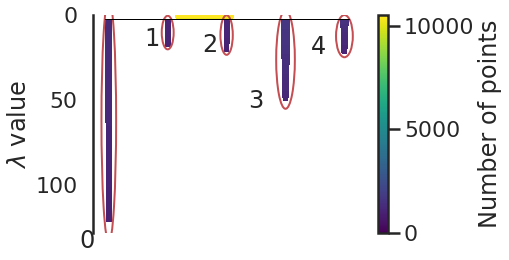

In [179]:
# Línea larga = cluster 3
clusterer5.condensed_tree_.plot(select_clusters = True, label_clusters=True)

In [161]:
unique, counts = np.unique(clusterer5.labels_, return_counts=True)

print(np.asarray((unique, counts)).T)

[[  -1 3879]
 [   0 1312]
 [   1 1065]
 [   2 1106]
 [   3 1670]
 [   4 1500]]


In [165]:
dataNoDims2D2['Cluster']=clusterer5.labels_

In [166]:
dataNoDims2D2[dataNoDims2D2['Cluster']==0].describe()

,COSTX,Cluster
count,1312.000000,1312.0
mean,66.117240,0.0
std,2148.794482,0.0
min,-26641.435700,0.0
25%,-232.115550,0.0
50%,31.298700,0.0
75%,273.560950,0.0
max,27623.969500,0.0


In [168]:
contingency = pd.crosstab(dataNoDims2D2[dataNoDims2D2['Cluster']==0].Cluster, dataNoDims2D2[dataNoDims2D2['Cluster']==0].CAT) 
contingency

CAT,CAT17-B
Cluster,
0,1312


In [ ]:
dataNoDims2D[dataNoDims2D['Cluster']==1].describe()

,COSTX,Cluster
count,1670.000000,1670.0
mean,-0.019123,1.0
std,1.229733,0.0
min,-8.284366,1.0
25%,-0.343998,1.0
50%,-0.001263,1.0
75%,0.372641,1.0
max,7.090630,1.0


In [170]:
contingency = pd.crosstab(dataNoDims2D2[dataNoDims2D2['Cluster']==1].Cluster, dataNoDims2D2[dataNoDims2D2['Cluster']==1].CAT) 
contingency

CAT,CAT17-A
Cluster,
1,1065


In [172]:
dataNoDims2D2[dataNoDims2D2['Cluster']==2].describe()

,COSTX,Cluster
count,1106.000000,1106.0
mean,-99.794812,2.0
std,3614.915887,0.0
min,-33374.092300,2.0
25%,-767.360200,2.0
50%,-11.969650,2.0
75%,695.293600,2.0
max,22249.394900,2.0


In [173]:
contingency = pd.crosstab(dataNoDims2D2[dataNoDims2D2['Cluster']==2].Cluster, dataNoDims2D2[dataNoDims2D2['Cluster']==2].CAT) 
contingency

CAT,CAT16-A
Cluster,
2,1106


In [176]:
dataNoDims2D2[dataNoDims2D2['Cluster']==3].describe()

,COSTX,Cluster
count,1670.000000,1670.0
mean,-239.916604,3.0
std,5825.014019,0.0
min,-39390.829700,3.0
25%,-1778.790000,3.0
50%,-155.320000,3.0
75%,1615.794950,3.0
max,33437.657100,3.0


In [175]:
contingency = pd.crosstab(dataNoDims2D2[dataNoDims2D2['Cluster']==3].Cluster, dataNoDims2D2[dataNoDims2D2['Cluster']==3].CAT) 
contingency

CAT,CAT12-A
Cluster,
3,1670


In [177]:
dataNoDims2D2[dataNoDims2D2['Cluster']==4].describe()

,COSTX,Cluster
count,1500.000000,1500.0
mean,-381.783043,4.0
std,9306.381650,0.0
min,-40013.935000,4.0
25%,-2482.610125,4.0
50%,453.062900,4.0
75%,2213.306825,4.0
max,39709.661400,4.0


In [178]:
contingency = pd.crosstab(dataNoDims2D2[dataNoDims2D2['Cluster']==4].Cluster, dataNoDims2D2[dataNoDims2D2['Cluster']==4].CAT) 
contingency

CAT,CAT14-A
Cluster,
4,1500


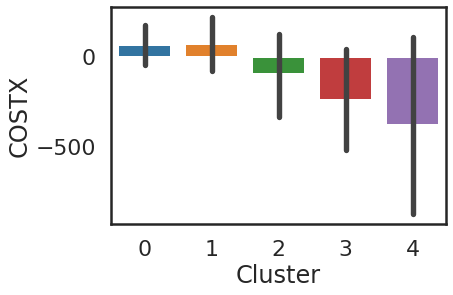

In [171]:
sns.barplot(x='Cluster', y='COSTX', data=dataNoDims2D2[dataNoDims2D2['Cluster']!=-1])

**Min. cluster size = 500 para evitar 1 cluster = 1 categoría**

In [233]:
dataNoDims2D3 = dataNoDims

In [234]:
dataNoDims2D3.sample(5)

,AISLE,IG,HTS,PLANNING,ABC,UOM,CAT,COSTX,QTYVAR,CONTRPERC,Cluster_dissimKP,Cluster_Gower
6949,15,IG54,HTS119,1/1,C,PC,CAT16,79.9920,84.87,0.00,11,-1
10862,27,IG55,HTS95,1/1,A,FT,CAT16,979.8639,1.00,0.02,6,7
7955,39,IG25,HTS48,1/1,A,BG,CAT7,-624.8219,-100.00,0.01,-1,-1
11116,12,IG54,HTS119,1/1,C,PC,CAT16,-1043.5064,-100.00,0.00,11,-1
9227,8,IG14,HTS15,1/1,C,BX,CAT8,-269.2143,-50.00,0.00,8,22


In [235]:
dataNoDims2D3 = dataNoDims2D3[dataNoDims2D3['ABC']!='C']

In [236]:
dataNoDims2D3.shape

(10532, 12)

In [237]:
dataNoDims2D3=dataNoDims2D3.reset_index(drop=True)

In [238]:
dataNoDims2D3 =  dataNoDims2D3.drop(['AISLE','IG','HTS','PLANNING','UOM','CONTRPERC','Cluster_dissimKP', 'Cluster_Gower'], axis=1)

In [239]:
numdf = dataNoDims2D3[list(dataNoDims2D3.select_dtypes('float64').columns)]

In [240]:
scaled_features = StandardScaler().fit_transform(numdf.values)
scaled_features_df = pd.DataFrame(scaled_features, index=numdf.index, columns=numdf.columns)
scaled_features_df

,COSTX,QTYVAR
0,-0.021135,-0.046247
1,0.084938,-0.018764
2,-0.016921,-0.052672
3,1.351250,1.746793
4,-0.187955,-0.062281
...,...,...
10527,-0.157306,-0.143099
10528,0.130101,-0.042636
10529,-0.120447,-0.054682
10530,0.808661,-0.042636


In [241]:
catdf = dataNoDims2D3[list(dataNoDims2D3.select_dtypes('object').columns)]

In [242]:
print("catdf",catdf.shape)
print("scaled_features_df",scaled_features_df.shape)
print(catdf.head(5))
print(scaled_features_df.head(5))
print(catdf.tail(5))
print(scaled_features_df.tail(5))
dataNoDimsEst = pd.concat((catdf, scaled_features_df), axis = 1)
dataNoDimsEst

catdf (10532, 2)
scaled_features_df (10532, 2)
  ABC    CAT
0   B  CAT17
1   B  CAT17
2   B  CAT17
3   B  CAT17
4   B  CAT17
      COSTX    QTYVAR
0 -0.021135 -0.046247
1  0.084938 -0.018764
2 -0.016921 -0.052672
3  1.351250  1.746793
4 -0.187955 -0.062281
      ABC   CAT
10527   B  CAT1
10528   B  CAT1
10529   B  CAT1
10530   A  CAT1
10531   A  CAT3
          COSTX    QTYVAR
10527 -0.157306 -0.143099
10528  0.130101 -0.042636
10529 -0.120447 -0.054682
10530  0.808661 -0.042636
10531  0.182353 -0.042636


,ABC,CAT,COSTX,QTYVAR
0,B,CAT17,-0.021135,-0.046247
1,B,CAT17,0.084938,-0.018764
2,B,CAT17,-0.016921,-0.052672
3,B,CAT17,1.351250,1.746793
4,B,CAT17,-0.187955,-0.062281
...,...,...,...,...
10527,B,CAT1,-0.157306,-0.143099
10528,B,CAT1,0.130101,-0.042636
10529,B,CAT1,-0.120447,-0.054682
10530,A,CAT1,0.808661,-0.042636


In [243]:
# Matriz de distancias de Gower
gowerDistMatrix = gower.gower_matrix(dataNoDimsEst)

In [244]:
gowerDistMatrix = np.float64(gowerDistMatrix)

In [245]:
clusterer6 = hdbscan.HDBSCAN(metric='precomputed', min_cluster_size=500)

In [246]:
clusterer6.fit(gowerDistMatrix)

HDBSCAN(algorithm='best', allow_single_cluster=False, alpha=1.0,
        approx_min_span_tree=True, cluster_selection_epsilon=0.0,
        cluster_selection_method='eom', core_dist_n_jobs=4,
        gen_min_span_tree=False, leaf_size=40,
        match_reference_implementation=False, memory=Memory(location=None),
        metric='precomputed', min_cluster_size=500, min_samples=None, p=None,
        prediction_data=False)

In [247]:
np.unique(clusterer6.labels_)

array([-1,  0,  1,  2,  3,  4,  5,  6])

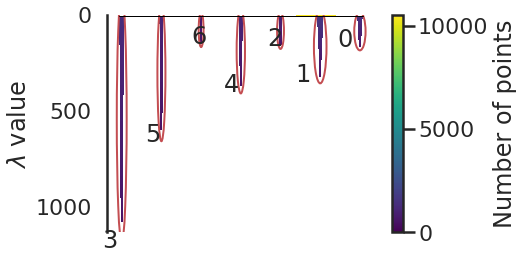

In [248]:
clusterer6.condensed_tree_.plot(select_clusters = True, label_clusters=True)

In [249]:
unique, counts = np.unique(clusterer6.labels_, return_counts=True)

print(np.asarray((unique, counts)).T)

[[  -1 2318]
 [   0 1500]
 [   1 1670]
 [   2  913]
 [   3 1312]
 [   4 1106]
 [   5 1065]
 [   6  648]]


In [250]:
dataNoDims2D3['Cluster']=clusterer6.labels_

In [251]:
dataNoDims2D3

,ABC,CAT,COSTX,QTYVAR,Cluster
0,B,CAT17,-289.8802,-2.63,3
1,B,CAT17,289.5527,25.00,3
2,B,CAT17,-266.8633,-9.09,3
3,B,CAT17,7206.8887,1800.00,3
4,B,CAT17,-1201.1481,-18.75,3
...,...,...,...,...,...
10527,B,CAT1,-1033.7254,-100.00,-1
10528,B,CAT1,536.2596,1.00,-1
10529,B,CAT1,-832.3808,-11.11,-1
10530,A,CAT1,4242.9481,1.00,-1


In [252]:
dataNoDims2D3[dataNoDims2D3['Cluster']==0].describe()

,COSTX,QTYVAR,Cluster
count,1500.000000,1500.000000,1500.0
mean,-381.783043,14.428573,0.0
std,9306.381650,187.024480,0.0
min,-40013.935000,-100.000000,0.0
25%,-2482.610125,-50.000000,0.0
50%,453.062900,1.000000,0.0
75%,2213.306825,7.410000,0.0
max,39709.661400,2800.000000,0.0


In [253]:
contingency = pd.crosstab(dataNoDims2D3[dataNoDims2D3['Cluster']==0].Cluster, dataNoDims2D3[dataNoDims2D3['Cluster']==0].CAT) 
contingency

CAT,CAT14
Cluster,
0,1500


In [255]:
dataNoDims2D3[dataNoDims2D3['Cluster']==1].describe()

,COSTX,QTYVAR,Cluster
count,1670.000000,1670.000000,1670.0
mean,-239.916604,53.584485,1.0
std,5825.014019,973.989860,0.0
min,-39390.829700,-100.000000,1.0
25%,-1778.790000,-100.000000,1.0
50%,-155.320000,-7.995000,1.0
75%,1615.794950,1.420000,1.0
max,33437.657100,34300.000000,1.0


In [256]:
contingency = pd.crosstab(dataNoDims2D3[dataNoDims2D3['Cluster']==1].Cluster, dataNoDims2D3[dataNoDims2D3['Cluster']==1].CAT) 
contingency

CAT,CAT12
Cluster,
1,1670


In [257]:
dataNoDims2D3[dataNoDims2D3['Cluster']==2].describe()

,COSTX,QTYVAR,Cluster
count,913.000000,913.000000,913.0
mean,-320.402618,82.016046,2.0
std,5958.556800,1484.878620,0.0
min,-38770.953700,-100.000000,2.0
25%,-1218.976300,-50.000000,2.0
50%,-60.824300,-1.890000,2.0
75%,1108.220100,5.880000,2.0
max,38770.953700,34920.000000,2.0


In [258]:
contingency = pd.crosstab(dataNoDims2D3[dataNoDims2D3['Cluster']==2].Cluster, dataNoDims2D3[dataNoDims2D3['Cluster']==2].CAT) 
contingency

CAT,CAT8
Cluster,
2,913


In [261]:
dataNoDims2D2[dataNoDims2D3['Cluster']==3].describe()

,COSTX,Cluster
count,1312.000000,1312.0
mean,66.117240,0.0
std,2148.794482,0.0
min,-26641.435700,0.0
25%,-232.115550,0.0
50%,31.298700,0.0
75%,273.560950,0.0
max,27623.969500,0.0


In [262]:
contingency = pd.crosstab(dataNoDims2D3[dataNoDims2D3['Cluster']==3].Cluster, dataNoDims2D3[dataNoDims2D3['Cluster']==3].CAT) 
contingency

CAT,CAT17
Cluster,
3,1312


In [263]:
dataNoDims2D3[dataNoDims2D3['Cluster']==4].describe()

,COSTX,QTYVAR,Cluster
count,1106.000000,1106.000000,1106.0
mean,-99.794812,37.922107,4.0
std,3614.915887,482.655958,0.0
min,-33374.092300,-100.000000,4.0
25%,-767.360200,-50.000000,4.0
50%,-11.969650,-0.445000,4.0
75%,695.293600,4.932500,4.0
max,22249.394900,8200.000000,4.0


In [264]:
contingency = pd.crosstab(dataNoDims2D3[dataNoDims2D3['Cluster']==4].Cluster, dataNoDims2D3[dataNoDims2D3['Cluster']==4].CAT) 
contingency

CAT,CAT16
Cluster,
4,1106


In [274]:
dataNoDims2D3[dataNoDims2D3['Cluster']==5].describe()

,COSTX,QTYVAR,Cluster
count,1065.000000,1065.000000,1065.0
mean,71.263205,72.741183,5.0
std,2749.772881,572.177471,0.0
min,-19367.641900,-100.000000,5.0
25%,-340.710000,-25.000000,5.0
50%,19.727200,0.870000,5.0
75%,354.107700,3.360000,5.0
max,16873.475800,8850.000000,5.0


In [275]:
contingency = pd.crosstab(dataNoDims2D3[dataNoDims2D3['Cluster']==5].Cluster, dataNoDims2D3[dataNoDims2D3['Cluster']==5].CAT) 
contingency

CAT,CAT17
Cluster,
5,1065


In [276]:
dataNoDims2D3[dataNoDims2D3['Cluster']==6].describe()

,COSTX,QTYVAR,Cluster
count,648.000000,648.000000,648.0
mean,-48.024970,22.683858,6.0
std,2218.007655,356.437892,0.0
min,-14927.452100,-100.000000,6.0
25%,-420.980675,-23.602500,6.0
50%,-5.179500,-0.250000,6.0
75%,312.835475,4.890000,6.0
max,11221.646300,5300.000000,6.0


In [277]:
contingency = pd.crosstab(dataNoDims2D3[dataNoDims2D3['Cluster']==6].Cluster, dataNoDims2D3[dataNoDims2D3['Cluster']==6].CAT) 
contingency

CAT,CAT16
Cluster,
6,648


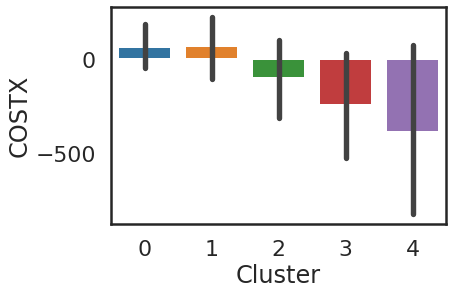

In [278]:
sns.barplot(x='Cluster', y='COSTX', data=dataNoDims2D2[dataNoDims2D2['Cluster']!=-1])

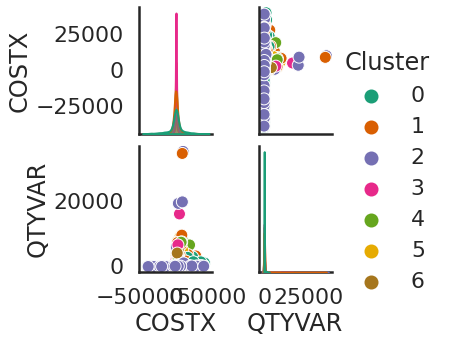

In [273]:
sns.pairplot(dataNoDims2D3[dataNoDims2D3['Cluster']!=-1],hue='Cluster',palette='Dark2',diag_kind='kde')